#### Basemap visulization 
We use the python package cartopy to visualize the basemap, and the basemap of cartopy is from: https://www.naturalearthdata.com/downloads/  


In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import rasterio as rio
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

1. Simple visualization of global map

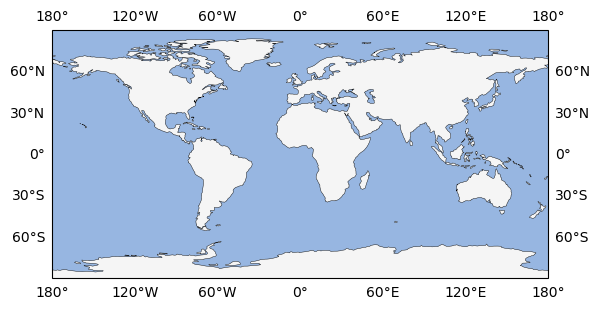

In [47]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, edgecolor='Black', linewidth=0.3)
gridl = ax.gridlines(draw_labels=True, linewidth=0.)


2. Different projection for the global map (can't show the map of different projection in the one figure.)

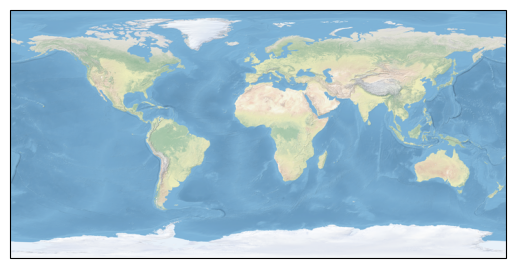

In [44]:
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.stock_img()



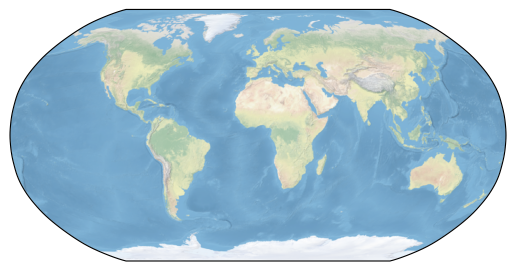

In [45]:
proj = ccrs.Robinson()
ax = plt.axes(projection=proj)
ax.stock_img()


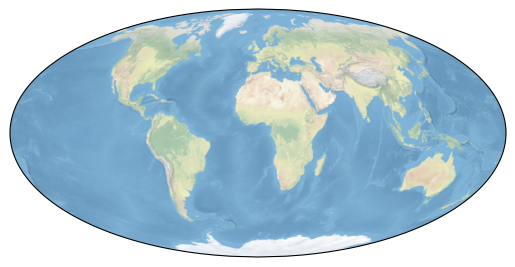

In [49]:
proj = ccrs.Mollweide()
ax = plt.axes(projection=proj)
ax.stock_img()


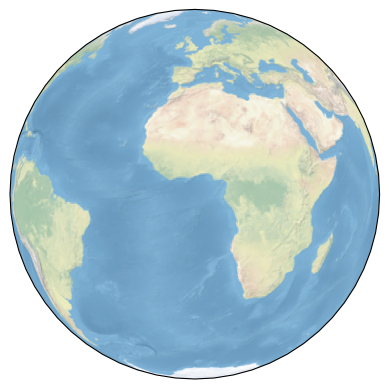

In [52]:
proj = ccrs.Orthographic()
ax = plt.axes(projection=proj)
ax.stock_img()

3. zoom in local region 

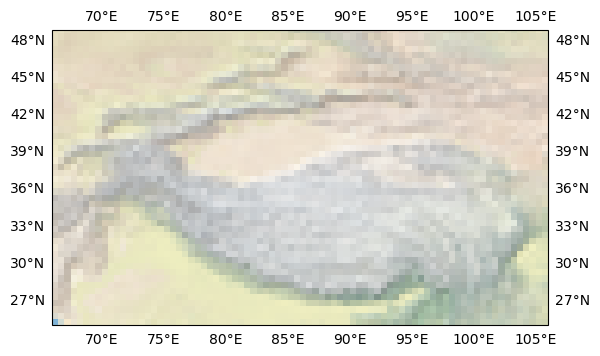

In [54]:
ax = plt.axes(projection=ccrs.PlateCarree())
region = [66,106,25,47]
ax.set_extent(region)
ax.stock_img()
gridl = ax.gridlines(draw_labels=True, linewidth=0.)


4. add land cover features 

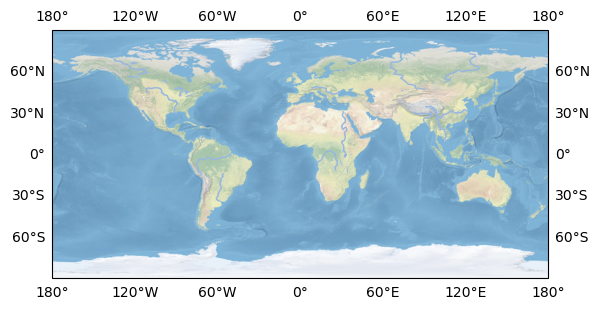

In [58]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.add_feature(cfeature.RIVERS.with_scale('110m'))   ### scale options: 10m, 50m, 110m(default).
ax.add_feature(cfeature.LAKES.with_scale('110m'))    ### scale options: 10m, 50m, 110m(default).
gridl = ax.gridlines(draw_labels=True, linewidth=0.)


5. dem visulization

In [4]:
path_dem = 'data/dem/hyd_glo_dem_30s.tif'
dem_rio = rio.open(path_dem)
dem_arr = dem_rio.read()
extent_dem = [dem_rio.bounds[0], dem_rio.bounds[2], dem_rio.bounds[1], dem_rio.bounds[3]]


In [26]:
dem_arr = np.float32(dem_arr)
dem_arr[dem_arr==32767]=np.nan

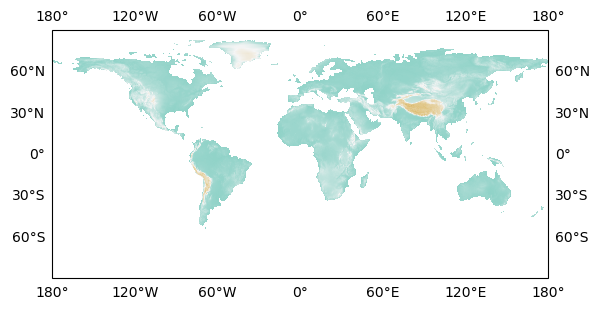

In [29]:
colors = [(128/255, 205/255, 193/255), (245/255, 245/255, 245/255), \
          (223/255, 194/255, 125/255), (166/255, 97/255, 26/255)]
cmap_dem = LinearSegmentedColormap.from_list('linear color', colors)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
ax.imshow(dem_arr[0], extent=extent_dem, cmap=cmap_dem)
gridl = ax.gridlines(draw_labels=True, linewidth=0.)

